C:\Anaconda3\envs\pytorch_cuda\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


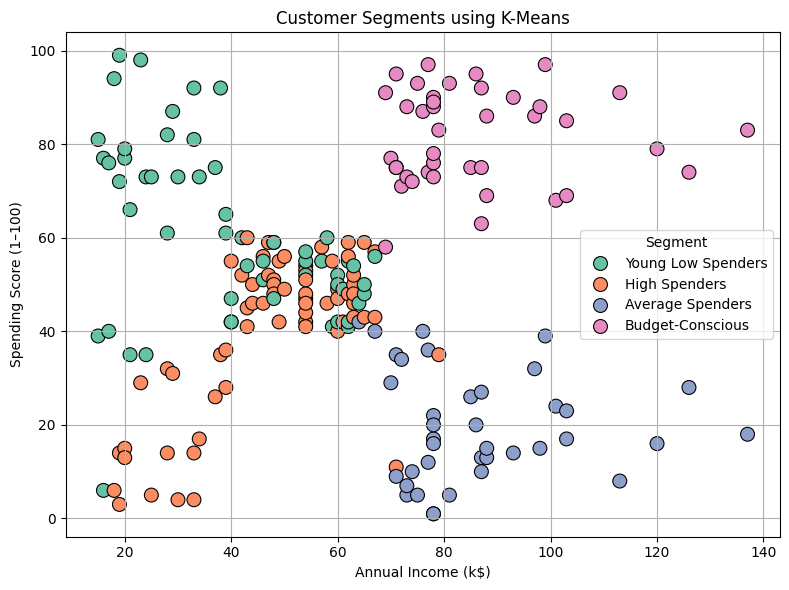

In [12]:
#Clustering of Mall Customers into High Spenders, Budget Conscious Spenders, Young Low Spenders, Average Spenders using Kmeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Mall_Customers.csv")


# Feature selection
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze each cluster to assign meaningful names
cluster_profiles = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profiles)

# Manual mapping of cluster numbers to names based on profiling
cluster_map = {
    0: 'High Spenders',
    1: 'Budget-Conscious',
    2: 'Young Low Spenders',
    3: 'Average Spenders'
}
df['Segment'] = df['Cluster'].map(cluster_map)

# Plot with descriptive segment labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment',
                data=df, palette='Set2', s=100, edgecolor='black')
plt.title('Customer Segments using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()
